In [1]:
# Needed to see animation if using jupyter notebook
%matplotlib notebook


Running integrated_simulation.py with BODY + FLUIDS


<IPython.core.display.Javascript object>


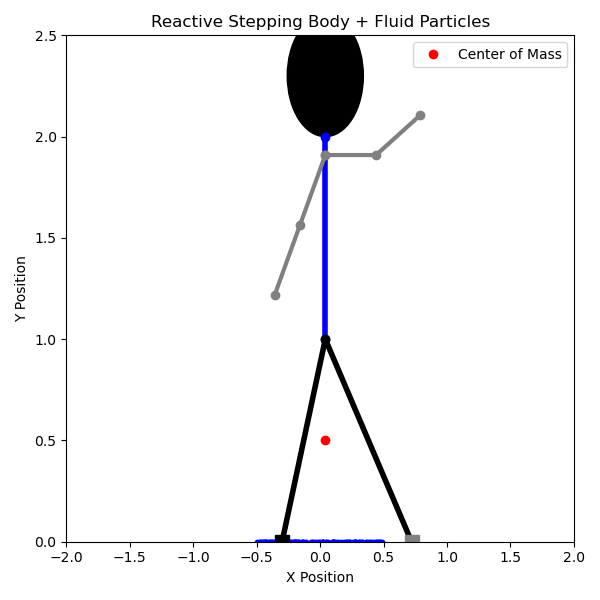

Update Frame: 0
Update Frame: 1
Update Frame: 2
Update Frame: 3
Update Frame: 4
Update Frame: 5
Update Frame: 6
Update Frame: 7
Update Frame: 8
Update Frame: 9
Update Frame: 10
Update Frame: 11
Update Frame: 12
Update Frame: 13
Update Frame: 14
Update Frame: 15
Update Frame: 16
Update Frame: 17
Update Frame: 18
Update Frame: 19
Update Frame: 20
Update Frame: 21
Update Frame: 22
Update Frame: 23
Update Frame: 24
Update Frame: 25
Update Frame: 26
Update Frame: 27
Update Frame: 28
Update Frame: 29
Update Frame: 30
Update Frame: 31
Update Frame: 32
Update Frame: 33
Update Frame: 34
Update Frame: 35
Update Frame: 36
Update Frame: 37
Update Frame: 38
Update Frame: 39
Update Frame: 40
Update Frame: 41
Update Frame: 42
Update Frame: 43
Update Frame: 44
Update Frame: 45
Update Frame: 46
Update Frame: 47
Update Frame: 48
Update Frame: 49
Update Frame: 50
Update Frame: 51
Update Frame: 52
Update Frame: 53
Update Frame: 54
Update Frame: 55
Update Frame: 56
Update Frame: 57
Update Frame: 58
Update 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import sys
import os

# Add module path
sys.path.append(os.path.abspath("../src/physics"))

from integrated_simulation import simulate_reactive_stepping_body

# Run the simulation
results = simulate_reactive_stepping_body()
(time, torso_x, torso_y, foot_positions, com_positions, step_events, 
 left_arm_joints, right_arm_joints, x_particles, y_trajectory) = results

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-2, 2)
ax.set_ylim(0, 2.5)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Reactive Stepping Body + Fluid Particles")

# Body elements
torso_line, = ax.plot([], [], 'o-', lw=4, color='blue')
leg_line, = ax.plot([], [], 'o-', lw=4, color='black')
left_arm_line, = ax.plot([], [], 'o-', lw=3, color='gray')
right_arm_line, = ax.plot([], [], 'o-', lw=3, color='gray')
com_marker, = ax.plot([], [], 'ro', markersize=6, label='Center of Mass')
head_circle = plt.Circle((0, 0), 0.3, color='black')
ax.add_patch(head_circle)
left_foot_marker, = ax.plot([], [], 's', color='black', markersize=10)
right_foot_marker, = ax.plot([], [], 's', color='gray', markersize=10)
step_text = ax.text(-1.5, 2.2, '', fontsize=10, color='darkred')

# Fluid particles
scat = ax.scatter([], [], color='blue', s=10)

ax.legend()


def init():
    torso_line.set_data([], [])
    leg_line.set_data([], [])
    left_arm_line.set_data([], [])
    right_arm_line.set_data([], [])
    com_marker.set_data([], [])
    left_foot_marker.set_data([], [])
    right_foot_marker.set_data([], [])
    head_circle.center = (0, 0)
    scat.set_offsets(np.empty((0, 2)))
    step_text.set_text('')
    return (torso_line, leg_line, left_arm_line, right_arm_line,
            com_marker, left_foot_marker, right_foot_marker, head_circle, scat, step_text)

def update(frame):
    print("Update Frame:", frame)

    lf_x, rf_x = foot_positions[frame]
    foot_y = 0
    com_x = com_positions[frame]
    com_y = 0.5
    tx = torso_x[frame]
    ty = torso_y[frame]

    # Legs
    knee_x = com_x
    knee_y = 1.0
    leg_x = [lf_x, knee_x, rf_x]
    leg_y = [foot_y, knee_y, foot_y]

    # Arms
    left_arm = left_arm_joints[frame]
    right_arm = right_arm_joints[frame]
    left_arm_x, left_arm_y = zip(*left_arm)
    right_arm_x, right_arm_y = zip(*right_arm)

    # Head
    x_shoulder = tx
    y_shoulder = ty - 0.2
    x_head = x_shoulder
    y_head = y_shoulder + 0.3 + 0.2
    head_circle.center = (x_head, y_head)

    # Fluid
    y_particles = y_trajectory[frame]
    scat.set_offsets(np.c_[x_particles, y_particles])

    torso_line.set_data([com_x, tx], [foot_y + 1, ty])
    leg_line.set_data(leg_x, leg_y)
    left_arm_line.set_data(left_arm_x, left_arm_y)
    right_arm_line.set_data(right_arm_x, right_arm_y)
    com_marker.set_data(com_x, com_y)
    left_foot_marker.set_data(lf_x, foot_y)
    right_foot_marker.set_data(rf_x, foot_y)

    if frame in step_events:
        step_text.set_text(f"Step triggered at t = {time[frame]:.2f}s")
    else:
        step_text.set_text("")

    return (torso_line, leg_line, left_arm_line, right_arm_line,
            com_marker, left_foot_marker, right_foot_marker, head_circle, scat, step_text)


ani = animation.FuncAnimation(
    fig, update, frames=len(time), init_func=init, blit=True, interval=20)

ani.save('output.mp4', fps=30)

plt.tight_layout()
plt.show()
